<a href="https://colab.research.google.com/github/jsaraujo5081/CursoPythonConfenalco/blob/notebooks/03Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRERIA PANDAS

## Contenido

* Librería Pandas 
* Series
* Data Frames
* Importación y Exportación de Data Frames
* Ejercicios

## Librería Pandas

Pandas es una librería de Python cuyo propósito es la manipulación y estructuración de datos tabulares (tablas). En este sentido permite el análisis multivariable y multiclase.

Dentro del contexto de análisis de datos y desarrollo de modelos analíticos, Pandas es una de las librerías más utilizadas cuando se trabaja con Python. 

* **Página Web:** https://pandas.pydata.org/.
* **Desarrollador:** AQR Capital Management  
* **Dato curioso:** En el entorno R su equivalente natural es el paquete tidyverse o data.table.

In [ ]:
#Importar (o cargar) la libreria
import pandas as pd

### Objetos

Pandas provee dos objetos fundamentales para el análisis de datos, los mismos que son los siguientes:

* Series
* Data Frames

## Series

Las series son colecciones unidimensionales de valores similares a los arreglos (*ndarray*) de NumPy de dimensión 1xn, o a las listas.

Su principal distinción es que además de contar con elementos, sus índices son modificables por el programador.

In [ ]:
#Crear una serie con Pandas
paises = pd.Series(["Ecuador","Colombia","Peru","Venezuela","Bolivia","Chile","Argentina","Uruguay","Paraguay","Brasil"])
paises

Los índices de una serie pueden modificarse con diferentes tipos de objetos como son listas o secuencias

In [ ]:
#Modificación de indices con una secuencia
paises = pd.Series(["Ecuador","Colombia","Peru","Venezuela","Bolivia","Chile","Argentina","Uruguay","Paraguay","Brasil"], 
                   index = range(0,100,10))
paises

In [ ]:
#Modificación de indices con una lista
paises = pd.Series(["Ecuador","Colombia","Peru","Venezuela","Bolivia","Chile","Argentina","Uruguay","Paraguay","Brasil"], 
                   index = ["EC","CO","PE","VE","BO","CL","AR","UY","PY","BR"])
paises

Asimismo, este objeto puede ser nombrado para un mejor entendimiento.

In [ ]:
#Nombrar serie e índices
paises.name = "Paises asociados a la Conmebol"
paises.index.name = "COD 2L"
paises

Las series pueden manipularse de forma similar a un arreglo o una lista. Por lo cual se pueden hacer indexaciones, enmascaramientos y filtros.

In [ ]:
#Indexar una serie por posición
paises[5]

In [ ]:
#Indexar una serie de forma semántica
paises["CO"]

In [ ]:
#Indexar varios elementos de forma semántica
paises[["EC","CO","PE","BO"]]

In [ ]:
#Recortar la serie
paises[:6]

In [ ]:
#Enmascarar una serie para seleccionar
fibonacci = pd.Series([0,1,1,2,3,5,8,13,21,34,55,89])
mask = fibonacci > 10
fibonacci[mask]

In [ ]:
# Enmascarar una serie con np.where
import numpy as np

fibonacci[np.where(fibonacci < 5,True,False)]

In [ ]:
#Enmascarar una serie con Pyhon Comprehension
paises_cortos = pd.Series([x for x in paises if len(x) < 7],
                          index = [x for x in paises.index if len(paises[x]) < 7])
paises_cortos

Las operaciones estadísticas de NumPy funcionan igualmente con series.

In [ ]:
#Sumar una serie
serie1 = pd.Series([10,20,30,40],index=range(0,4))
np.sum(serie1)

In [ ]:
#Promedio de una serie
np.mean(serie1)

También las series pueden ser utilizadas dentro de declaraciones como son lazos o condicionales.

In [ ]:
#Imprimir la razón entre un término de la serie de fibonacci y el término anterior
for i in fibonacci.index:
  if i >= 2:
    print(fibonacci[i]/fibonacci[i-1])
  else:
    continue

**Dato Curioso**: A medida que la serie de fibonacci tiene más elementos, esta razón converge a un número muy famoso. ¿Sabe cuál es?

In [ ]:
#Imprimir el pais, una flecha y su código a partir de la serie paises usando el operador zip
for i,val in zip(paises.index,paises):
  print(val + " -> " + i)

Finalmente, estas son otras operaciones interesantes a ejecutar con series

In [ ]:
#Combinar series
serie1 = pd.Series([10,20,30,40],index=range(4) )
serie2 = pd.Series([1,2,3],index=range(3) )
serie3 = serie1.append(serie2)
serie3

In [ ]:
#Ordenar una serie por valores
serie4 = serie3.sort_values(ascending = False)
serie4

In [ ]:
#Ordenar una serie por indices
paises_ord = paises.sort_index()
paises_ord

## Data Frames

Los data frames son arreglos tabulares representados en filas y columnas, donde cada columna puede entenderse como una serie que comparte el índice con las demás.

Un data frame es la forma más natural de representar datos de manera estructurada cuando se realiza análisis de datos

Si bien Pandas controla esto, todo analista de datos debe saber que cada columna representa una variable, y por ende, solamente puede existir una clase o tipo(Esto se relaciona con el concepto de unicidad y consistencia de los datos).

En Pandas, un data frame puede crearse a partir de un diccionario con valores de igual tamaño, donde los nombres identifican las columnas. 

In [ ]:
#Crear un diccionario de elementos de igual longitud DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = {"nombre" : ["Manuel","Laura","Mariza","Pedro"], "edad" : [34,29,12,8], "sexo" : ["H","M","M","H"]}

#Construir Data Frame
df_familia = pd.DataFrame(diccionario)
df_familia

Mediante los argumentos *index* y *columns* es posible controlar los nombres de los índices y las columnas.

### Indexación, filtración y enmascaramiento

Igualmente, es posible realizar indexaciones, pero con unas particularidades como se indican a continuación:

In [ ]:
#Indexar por columnas de forma semántica
df_familia["nombre"]

In [ ]:
#Indexar por columnas (otra forma)
df_familia.nombre

In [ ]:
#Indexar por columnas y luego por filas
df_familia["nombre"][0]
#df_familia.nombre[0]

Para ejecutar indexaciones por filas se requiere el uso de los métodos *loc* e *iloc*. Para entender su diferencia, cambiemos los indices en el data frame:

In [ ]:
#Cambiar indices
df_familia.index = ["a","b","c","d"]
df_familia

In [ ]:
#Indexar por filas usando loc
df_familia.loc["b"]

In [ ]:
#Indexar por filas usando iloc
df_familia.iloc[1]

Entendido esto, para ejecutar filtración, ya sea por filas o por columnas, se hace lo siguiente:

In [ ]:
#Crear diccionario con personajes de Calabozos y Dragones
d_and_d = {'Name' : ['bundenth','theorin','barlok'], 'Strength' : [10,12,19], 'Wisdom' : [20,13,6]}

#Crear data frame
df_dd = pd.DataFrame(d_and_d, index= range(0,30,10))
df_dd

In [ ]:
#Filtrar for columnas
df_dd[["Name","Wisdom"]]

In [ ]:
#Otra forma usando loc e iloc
df_dd.loc(axis=1)[["Name","Wisdom"]] #Para qué sirve el argumento adicional de axis?

In [ ]:
#Filtrar por filas con loc
df_dd.loc[:10]

In [ ]:
#Filtrar por filas con iloc
df_dd.iloc[1:]

Y para ejecutar enmascaramientos, se ejecutan codigos como los siguientes:

In [ ]:
#Seleccionar solamente los personajes con fuerza mayor a 10
strength = df_dd.Strength
mascara = strength > 10
df_dd[mascara]

In [ ]:
#O lo que es lo mismo en una sola línea
df_dd[df_dd.Strength > 10]

In [ ]:
#Personajes con fuerza mayor a 15 o Sabiduria mayor a 15
m = (df_dd['Strength'] > 15) | (df_dd['Wisdom'] > 15)
df_dd[m]

In [ ]:
#Mascara usando np.where
df_dd[np.where((df_dd.Strength > 15) | (df_dd.Wisdom > 15),True,False)]

### Inclusión y exclusión de elementos

Se pueden añadir elementos dentro de un data frame, ya sea como columnas o como filas. Volvamos a nuestro data frame de familia.

In [ ]:
#Añadir una nueva columna (CUIDADO con mantener las mismas filas)
df_familia["rol"] = ["Padre","Madre","Hijo","Hijo"]
df_familia

In [ ]:
#Añadir una nueva fila (CUIDADO con mantener las mismas columnas)
df_familia.loc["e"] = ["Gonzalo",65,"H","Abuelo"]
df_familia
#Igualmente se puede usar iloc

Se pueden eliminar asimismo filas o columnas

In [ ]:
#Eliminar fila
df_familia = df_familia.drop("c")
df_familia

In [ ]:
#Eliminar columna
del df_familia["sexo"]
df_familia

## Importación y Exportación de Data Frames

Existen diversas formas de cargar y guardar datos desde Python, sin embargo, por ahora nos concentraremos en lo que se puede hacer con Pandas y aprovecharemos para crear un repositorio en GitHub donde se puedan grabar no solamente tablas, sino también scripts y notebooks que desarrollemos.

### Crear Repositorio en Github

GitHub es un repositorio web enfocado en los entornos open source, que permite el almacenamiento, control y gestión compartida de datos, códigos y funcionalidades. Su uso es muy extendido a nivel de científicos de datos, analistas de datos, ingenieros de datos y desarrolladores debido a su facilidad de uso y flexibilidad.

Vamos entonces a crear un repositorio personal:

* En primer lugar cree cada uno una cuenta personal en GitHub en https://github.com/. 
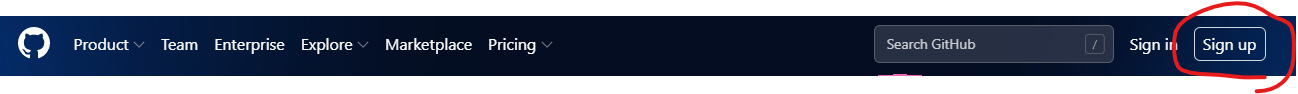
* A continuación, conviene descargar la versión de escritorio de Github en la siguiente direccion: https://desktop.github.com/. Una vez descargado el ejecutable, instalemos esta aplicación en nuestro computador.
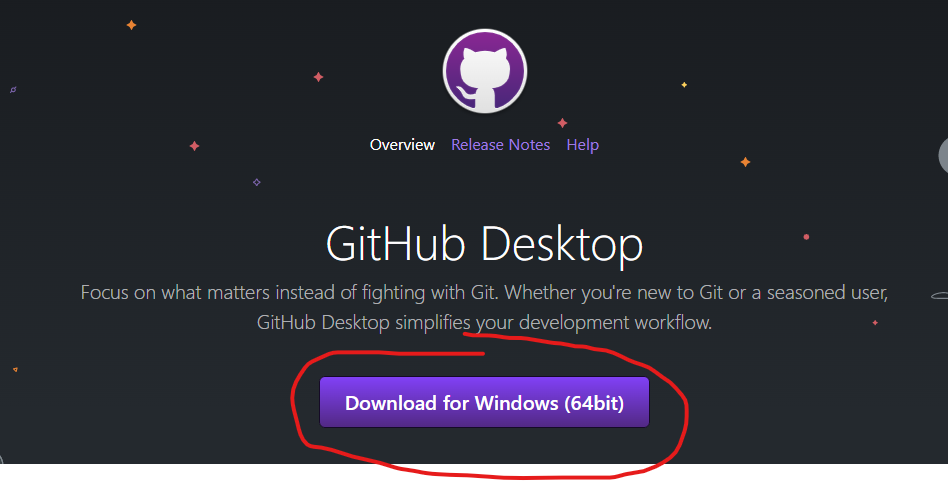


* Dentro de la aplicación GitHub conéctese a su usuario y cree un nuevo repositorio en **Archivo > Nuevo Repositorio...** (Si está en inglés ingese a **File > New Repository...**  

* Ingrese un nombre y una descripción para su nuevo repositorio y haga click en **Crear repositorio**.
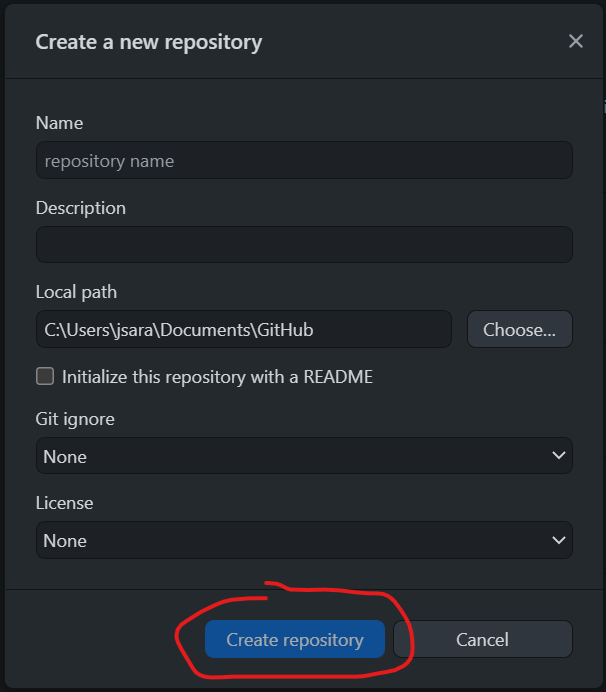

* Finalmente, vamos a publicar nuestro repositorio en el Internet, para esto podemos hacer click en el botón **Publicar repositorio** en la parte superior de nuestra aplicación.
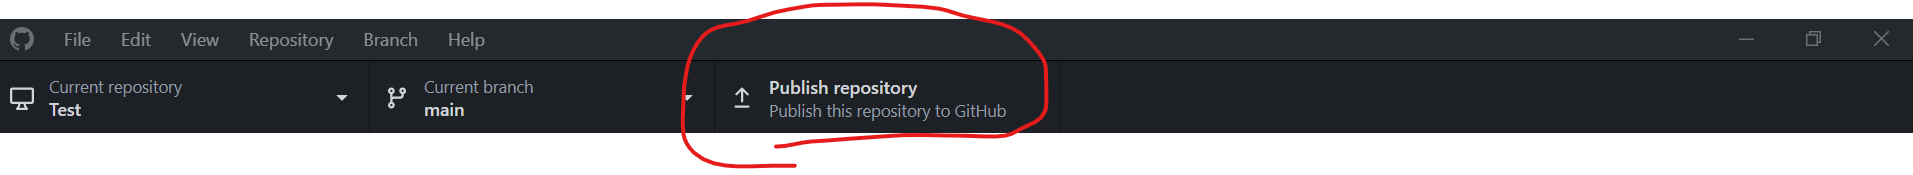




* En la ventana que aparece simplemente hacemos click en **Publicar repositorio** y listo. IMPORTANTE: si queremos que nuestro repositorio sea visible para cualquier usuario debemos quitar el check a la opcion que indica **Mantener este codigo privado**.

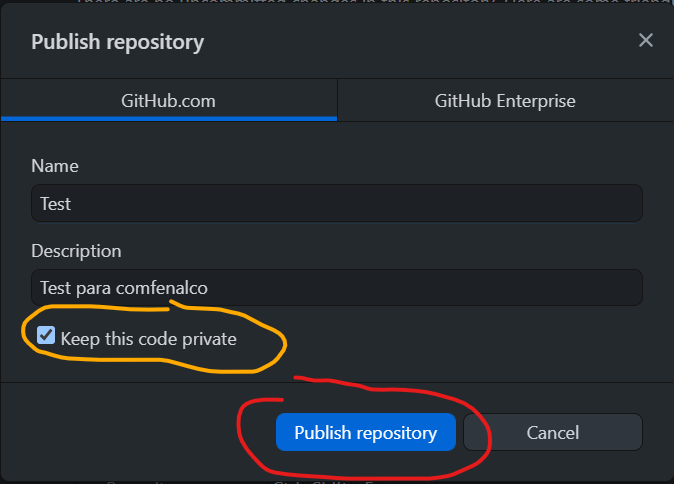

### Importar Data Frames

Pandas ofrece funciones que facilitan la importación de diferentes tipos de archivos "planos" como son CSV, TXT, XLSX. En general, estas funciones requieren conocer como argumento la ruta de acceso (*filepath*), la misma que puede ser una ruta local o una url. 

Veamos estas funciones:

* *read_csv*: importar archivos con una extensión *.csv*. Esto es, los datos están separados por comas ","

https://raw.githubusercontent.com/jsaraujo5081/CursoPythonConfenalco/data/ejemplo_csv.csv

In [ ]:
#Importar un archivo .csv
filepath = "https://raw.githubusercontent.com/jsaraujo5081/CursoPythonConfenalco/data/ejemplo_csv.csv"
df_csv = pd.read_csv(filepath, header=0)

El argumento *header* especifica la fila donde se encuentran los nombres de las columnas.

In [ ]:
#Visualizar los primeros 10 elementos en la tabla importada
df_csv.head(10)

* *read_table*: importar archivos con extensiones diversas como *.txt*, donde se debe especificar el separador utilizado con el arugmento *sep*.

https://raw.githubusercontent.com/jsaraujo5081/CursoPythonConfenalco/data/ejemplo_tsv.txt

In [ ]:
#Importar un archivo separado por tabulados con extension .txt
filepath = "https://raw.githubusercontent.com/jsaraujo5081/CursoPythonConfenalco/data/ejemplo_tsv.txt"
df_tabs = pd.read_table(filepath, header = 0, sep = "\t")

In [ ]:
#Visualizar los primeros 5 elementos en la tabla importada
df_tabs.head(5)

In [ ]:
#Conocer la estructura del data frame
df_tabs.info()

Otro ejemplo de importación de un archivo separado por puntos y comas ";":

https://raw.githubusercontent.com/jsaraujo5081/CursoPythonConfenalco/data/ejemplo_pyc.txt

In [ ]:
#Importar un archivo separado por punto y coma con extension .txt
filepath = "https://raw.githubusercontent.com/jsaraujo5081/CursoPythonConfenalco/data/ejemplo_pyc.txt"
df_puntocoma = pd.read_table(filepath, header = 0, sep = ";")

In [ ]:
#Visualizar los primeros 5 elementos en la tabla importada
df_puntocoma.head(5)

In [ ]:
#Conocer la estructura del data frame
df_puntocoma.info()

In [ ]:
#Obtener un resumen estadístico base del data frame
df_puntocoma.describe()

* *read_excel*: importar archivos con extensión *.xlsx*, Especificando la hoja donde se encuentra la tabla con el aragumento *sheet_name*. 

https://github.com/jsaraujo5081/CursoPythonConfenalco/blob/data/ejemplo_xls.xlsx?raw=true

In [ ]:
filepath = "https://github.com/jsaraujo5081/CursoPythonConfenalco/blob/data/ejemplo_xls.xlsx?raw=true"
df_excel = pd.read_excel(filepath, header = 0, sheet_name=0, index_col = 0) 

Notese que se han usado el argumento *index_col* para especificar cual columna corresponde al índice en el data frame.

In [ ]:
#Visualizar los primeros 5 elementos en la tabla importada
df_excel.head(5)

In [ ]:
#Conocer las dimensiones del data frame
df_excel.shape

Pandas tiene otras funciones para importar desde otras fuentes como son:

* *read_sql*: importar una vista desde una consulta de SQL.
* *read_html*: importar un tabla en formato HTML. 

### Exportar Data Frames

Pandas igualmente permite guardar o exportar data frames con diversas funciones especificando una ruta de acceso local. PAra esto se utiliza en gran medida el método *to_csv* de cada data frame.

A modo de ejercicio, además vamos a guardar tablas en nuestro GitHub siguiendo los siguientes pasos: 

* Crear la ruta de acceso definiendo un nombre cualquiera para nuestro archivo, e incorporando la extensión que deseemos (.csv,.txt,...)

In [ ]:
#Crear ruta de acceso (CUIDADO no olvidarse de la extensión)
filepath = "df_prueba.csv"

* Exportar al repositorio el data frame, especificando el separador que necesitemos con el argumento *sep*.

In [ ]:
#Exportar el data frame
df_excel.to_csv(filepath, sep = ",")

* Descargar el data frame exportado al computador local mediante el siguiente código:

In [ ]:
#Descargar archivo en computador local
from google.colab import files
files.download(filepath)

* Una vez descargado abrirlo y guardarlo en la ruta local donde se encuentra el repositorio GitHub creado. Para conocer donde esta ruta primero hacer click en el botón **Mostrar en Explorador**, y seguidamente copiar la ruta desde allí.
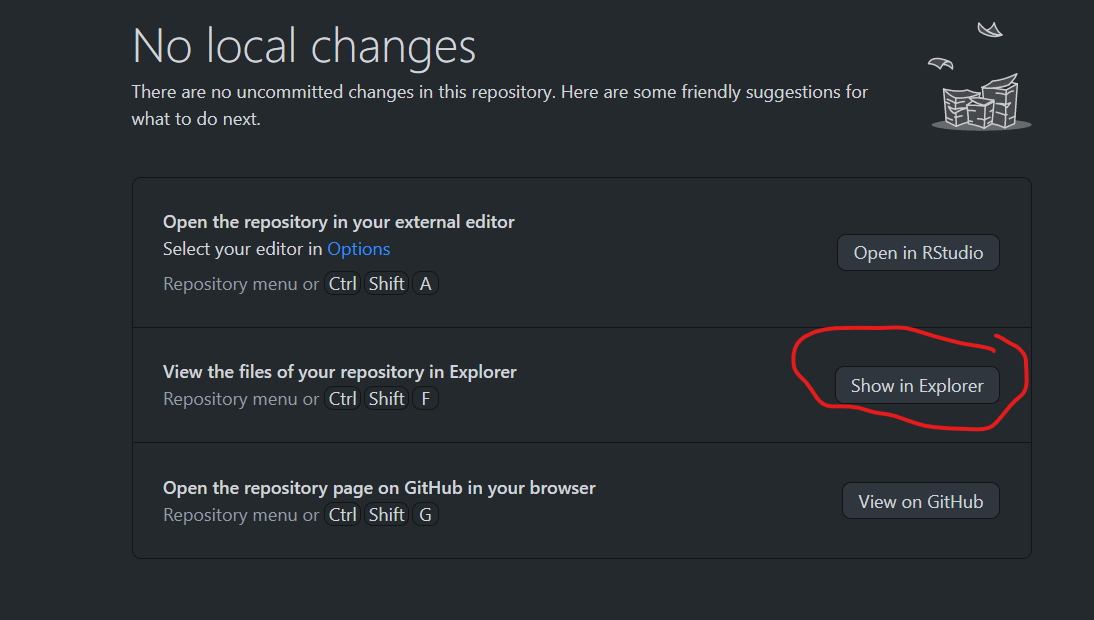


* Una vez guardado, en la aplicación de Github hacemos click en **Commit to main**.

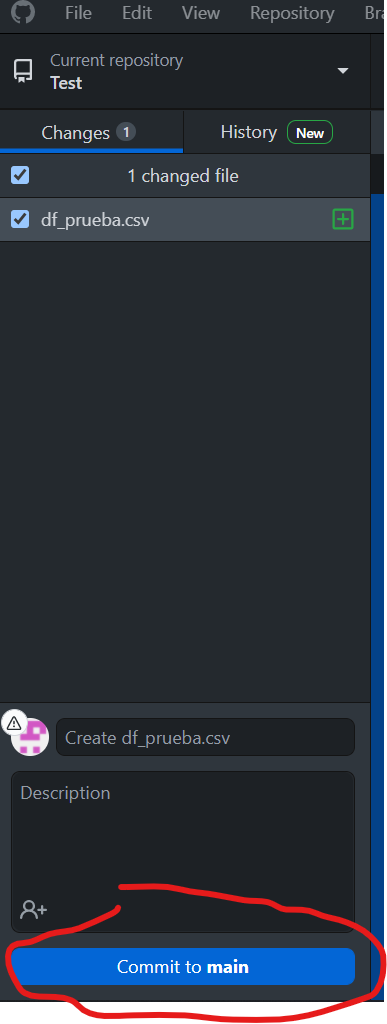

* Y finalmente hacer click en **Push origin** para que el archivo quede cargado en el internet también.

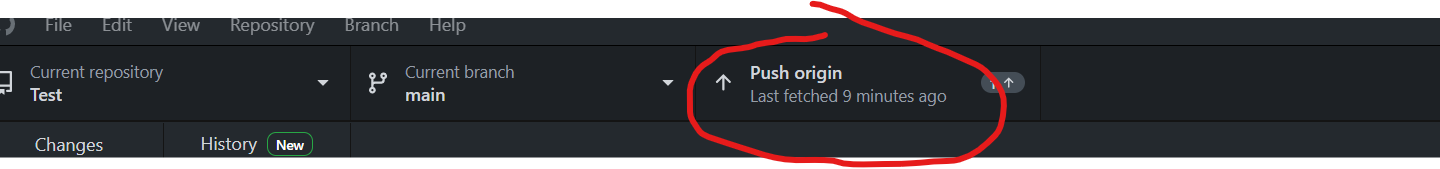

Una vez exportado de esta forma, es posible acceder facilmente a este archivo mediante las funciones de importación antes vistas. Para esto es importante conocer la url donde se encuentra.

In [ ]:
#Importar archivo guardado
filepath = "https://raw.githubusercontent.com/jsaraujo5081/Test/main/df_prueba.csv"
df_prueba = pd.read_csv(filepath, header = 0)
df_prueba.head(5)

## Ejercicios

1. Cree un data frame a partir de un diccionario, el cual contenga al menos 10 filas y 5 columnas (entre texto y numéricas)

2. Genere una descripción estadística del data frame 

3. Exporte el data frame separado por tabulados dentro de su repositorio en Github